In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
# register_matplotlib_converters()
np.random.seed(42)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load the data and transform the format for easier manipulations

In [3]:
data = pd.read_csv('pd_speech_features.csv', sep=",", decimal='.', header=[0,1])
data.head(5)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Baseline Features,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Intensity Parameters,Unnamed: 24_level_0,Unnamed: 25_level_0,Formant Frequencies,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Bandwidth Parameters,Unnamed: 31_level_0,Unnamed: 32_level_0,Unnamed: 33_level_0,Vocal Fold,Unnamed: 35_level_0,Unnamed: 36_level_0,Unnamed: 37_level_0,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Unnamed: 41_level_0,Unnamed: 42_level_0,Unnamed: 43_level_0,Unnamed: 44_level_0,Unnamed: 45_level_0,Unnamed: 46_level_0,Unnamed: 47_level_0,Unnamed: 48_level_0,Unnamed: 49_level_0,Unnamed: 50_level_0,Unnamed: 51_level_0,Unnamed: 52_level_0,Unnamed: 53_level_0,Unnamed: 54_level_0,Unnamed: 55_level_0,MFCC,Unnamed: 57_level_0,Unnamed: 58_level_0,Unnamed: 59_level_0,Unnamed: 60_level_0,Unnamed: 61_level_0,Unnamed: 62_level_0,Unnamed: 63_level_0,Unnamed: 64_level_0,Unnamed: 65_level_0,Unnamed: 66_level_0,Unnamed: 67_level_0,Unnamed: 68_level_0,Unnamed: 69_level_0,Unnamed: 70_level_0,Unnamed: 71_level_0,Unnamed: 72_level_0,Unnamed: 73_level_0,Unnamed: 74_level_0,Unnamed: 75_level_0,Unnamed: 76_level_0,Unnamed: 77_level_0,Unnamed: 78_level_0,Unnamed: 79_level_0,Unnamed: 80_level_0,Unnamed: 81_level_0,Unnamed: 82_level_0,Unnamed: 83_level_0,Unnamed: 84_level_0,Unnamed: 85_level_0,Unnamed: 86_level_0,Unnamed: 87_level_0,Unnamed: 88_level_0,Unnamed: 89_level_0,Unnamed: 90_level_0,Unnamed: 91_level_0,Unnamed: 92_level_0,Unnamed: 93_level_0,Unnamed: 94_level_0,Unnamed: 95_level_0,Unnamed: 96_level_0,Unnamed: 97_level_0,Unnamed: 98_level_0,Unnamed: 99_level_0,Unnamed: 100_level_0,Unnamed: 101_level_0,Unnamed: 102_level_0,Unnamed: 103_level_0,Unnamed: 104_level_0,Unnamed: 105_level_0,Unnamed: 106_level_0,Unnamed: 107_level_0,Unnamed: 108_level_0,Unnamed: 109_level_0,Unnamed: 110_level_0,Unnamed: 111_level_0,Unnamed: 112_level_0,Unnamed: 113_level_0,Unnamed: 114_level_0,Unnamed: 115_level_0,Unnamed: 116_level_0,Unnamed: 117_level_0,Unnamed: 118_level_0,Unnamed: 119_level_0,Unnamed: 120_level_0,Unnamed: 121_level_0,Unnamed: 122_level_0,Unnamed: 123_level_0,Unnamed: 124_level_0,Unnamed: 125_level_0,Unnamed: 126_level_0,Unnamed: 127_level_0,Unnamed: 128_level_0,Unnamed: 129_level_0,Unnamed: 130_level_0,Unnamed: 131_level_0,Unnamed: 132_level_0,Unnamed: 133_level_0,Unnamed: 134_level_0,Unnamed: 135_level_0,Unnamed: 136_level_0,Unnamed: 137_level_0,Unnamed: 138_level_0,Unnamed: 139_level_0,Wavelet Features,Unnamed: 141_level_0,Unnamed: 142_level_0,Unnamed: 143_level_0,Unnamed: 144_level_0,Unnamed: 145_level_0,Unnamed: 146_level_0,Unnamed: 147_level_0,Unnamed: 148_level_0,Unnamed: 149_level_0,Unnamed: 150_level_0,Unnamed: 151_level_0,Unnamed: 152_level_0,Unnamed: 153_level_0,Unnamed: 154_level_0,Unnamed: 155_level_0,Unnamed: 156_level_0,Unnamed: 157_level_0,Unnamed: 158_level_0,Unnamed: 159_level_0,Unnamed: 160_level_0,Unnamed: 161_level_0,Unnamed: 162_level_0,Unnamed: 163_level_0,Unnamed: 164_level_0,Unnamed: 165_level_0,Unnamed: 166_level_0,Unnamed: 167_level_0,Unnamed: 168_level_0,Unnamed: 169_level_0,Unnamed: 170_level_0,Unnamed: 171_level_0,Unnamed: 172_level_0,Unnamed: 173_level_0,Unnamed: 174_level_0,Unnamed: 175_level_0,Unnamed: 176_level_0,Unnamed: 177_level_0,Unnamed: 178_level_0,Unnamed: 179_level_0,Unnamed: 180_level_0,Unnamed: 181_level_0,Unnamed: 182_level_0,Unnamed: 183_level_0,Unnamed: 184_level_0,Unnamed: 185_level_0,Unnamed: 186_level_0,Unnamed: 187_level_0,Unnamed: 188_level_0,Unnamed: 189_level_0,Unnamed: 190_level_0,Unnamed: 191_level_0,Unnamed: 192_level_0,Unnamed: 193_level_0,Unnamed: 194_level_0,Unnamed: 195_level_0,Unnamed: 196_level_0

In [4]:
# Rename the columns for a more appealing view
prev_col_name = ''
column_names = []
for c in data.columns:
    if not c[0].startswith('Unnamed'):
        prev_col_name = c[0]
    column_names.append(f'{prev_col_name}-{c[1]}')
column_names[-1] = 'class'
data.columns = column_names

data.head(3)

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

## Some generic data exploratory analysis

In [5]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [6]:
# Very informative...
data.describe()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

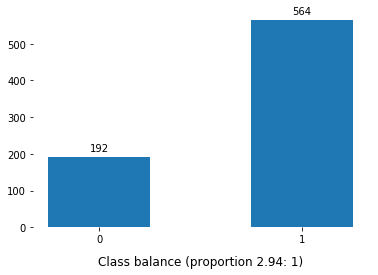

In [7]:
target_count = pd.value_counts(data['class'].values.flatten())
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)
proportion = target_count[ind_min_class] / target_count[1-ind_min_class]

fig, ax = plt.subplots()
plt.title(f'Class balance (proportion {proportion:.2f}: 1)', y=-0.2)
plt.box(False)
# ax.yaxis.set_visible(False)
ax.bar(target_count.index, target_count.values, width=0.5, tick_label=target_count.index)
for x, y in zip(target_count.index, target_count.values):
    ax.text(x, y + 10, str(y), horizontalalignment='center', verticalalignment='bottom')
plt.show()

## Preprocessing
As each preprocessing step has to be numerically analized and reasoned about, for each preprocessing technique we will evaluate the preprocessing technique on several classifiers and decide if we want to keep the change or not based on the performance gain.

The performance will be evaluated on several classifiers including knn, naive bayes, xgboost, etc. If there was a performance gain after applying that preprocessing step, we will include that preprocessing step in our pipeline.

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

In [9]:
def split(df, test_size=0.3):
    patient_ids = np.unique(df['-id'].values)
    test_patient_ids = np.random.choice(patient_ids, int(len(patient_ids) * test_size))
    train_patient_ids = list(set(patient_ids) - set(test_patient_ids))
    
    test_patients = df[df['-id'].isin(test_patient_ids)]
    train_patients = df[df['-id'].isin(train_patient_ids)]
    
    X_train = train_patients.loc[:, ~train_patients.columns.isin(['class'])]
    y_train = train_patients.loc[:, train_patients.columns.isin(['class'])]
    X_test = test_patients.loc[:, ~test_patients.columns.isin(['class'])]
    y_test = test_patients.loc[:, test_patients.columns.isin(['class'])]

    return X_train.values, X_test.values, y_train.values.flatten(), y_test.values.flatten()

In [10]:
def evaluate(df, split_dataset=split, knn=None, tree=None, rf=None, boost=None):
    def report(y_pred):
        return {
            'Accuracy': metrics.accuracy_score(y_test, y_pred),
            'ROC AUC': metrics.roc_auc_score(y_test, y_pred),
    #         'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred),
            'Sensitivity': metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        }
    
    X_train, X_test, y_train, y_test = split_dataset(df)
    res = {}
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    res['Naive Bayes'] = report(nb.predict(X_test))
    
    if knn is None:
        knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    res['KNN'] = report(knn.predict(X_test))
    
    if tree is None:
        tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    res['Decision Tree'] = report(tree.predict(X_test))

    if rf is None:
        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    rf.fit(X_train, y_train)
    res['Random Forest'] = report(rf.predict(X_test))
    
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    if boost is None:
        boost = xgb.train({'eta': 0.3, 'max_depth': 5, 'objective': 'multi:softprob', 'num_class': 2}, D_train, 10)
    preds = boost.predict(D_test)
    res['xgboost'] = report(np.asarray([np.argmax(line) for line in preds]))
    
    return res

evaluate(data)

{'Naive Bayes': {'Accuracy': 0.7486338797814208,
  'ROC AUC': 0.571256038647343,
  'Sensitivity': 0.9202898550724637},
 'KNN': {'Accuracy': 0.7923497267759563,
  'ROC AUC': 0.6077294685990338,
  'Sensitivity': 0.9710144927536232},
 'Decision Tree': {'Accuracy': 0.7377049180327869,
  'ROC AUC': 0.6014492753623188,
  'Sensitivity': 0.8695652173913043},
 'Random Forest': {'Accuracy': 0.8469945355191257,
  'ROC AUC': 0.711352657004831,
  'Sensitivity': 0.9782608695652174},
 'xgboost': {'Accuracy': 0.8306010928961749,
  'ROC AUC': 0.7229468599033817,
  'Sensitivity': 0.9347826086956522}}

In [11]:
def show_progress(evaluations, labels, metric='ROC AUC'):
    methods = evaluations[0].keys()
    evaluations = [[results[metric] for method, results in evaluation.items()] for evaluation in evaluations]
    fig, ax = plt.subplots()
    ind = np.arange(len(evaluations[0]))
    width = 0.2
    
    p = [ax.bar(ind + i*width, height=evaluation, width=width, bottom=0) for i, evaluation in enumerate(evaluations)]
    
    ax.set_title(f'{metric} Scores')
    ax.set_xticks(ind + width / len(evaluations) * (len(evaluations) - 1))
    ax.set_xticklabels(methods)

    ax.legend(labels, loc='lower right', fancybox=True, shadow=True)
    ax.autoscale_view()

    plt.xticks(rotation=90)
    plt.show()

### 1. Standardization vs Normalization

In [12]:
standard = data.copy()
normal = data.copy()
for c in data.columns[2:-1]:
    standard[c] = (data[c] - data[c].mean()) / data[c].std()
    normal[c]   = (data[c] - data[c].mean()) / (data[c].max() - data[c].min())
standard.head()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

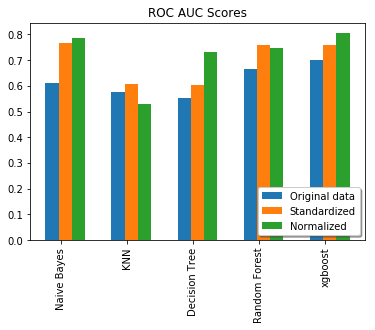

In [13]:
show_progress(evaluations=[evaluate(data), evaluate(standard), evaluate(normal)], 
              labels=['Original data', 'Standardized', 'Normalized'], 
              metric='ROC AUC')

* As we can see, the step improved the performance of the model a lot for almost all the models.
* The performance changes from data standardization to data normalization is not significant for most of the cases
* But normalization seems to have superior performance
* So, we will keep data normalization as part of our pipeline

In [14]:
data = normal

### 2. Oversampling vs Undersampling

In [15]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.over_sampling import SMOTE, ADASYN

def oversampled_data_split(df, test_size=0.3):
    X_train, X_test, y_train, y_test = split(df, test_size)
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def oversampled_ADASYN_data_split(df, test_size=0.3):
    X_train, X_test, y_train, y_test = split(df, test_size)
    X_train, y_train = ADASYN().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def undersampled_data_split(df, test_size=0.3):
    X_train, X_test, y_train, y_test = split(df, test_size)
    X_train, y_train = RepeatedEditedNearestNeighbours().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

Using TensorFlow backend.


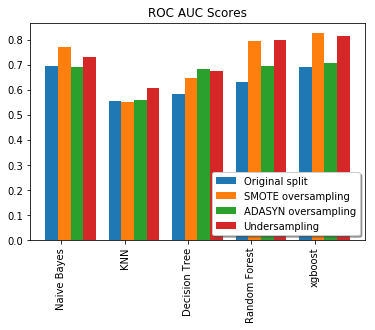

In [16]:
show_progress(evaluations=[evaluate(data), 
                           evaluate(data, split_dataset=oversampled_data_split), 
                           evaluate(data, split_dataset=oversampled_ADASYN_data_split), 
                           evaluate(data, split_dataset=undersampled_data_split),
                          ], 
              labels=['Original split', 'SMOTE oversampling', 'ADASYN oversampling', 'Undersampling'], 
              metric='ROC AUC')

* As we can see SMOTE oversampling and RepeatedEditedNearestNeighbours undersampling perform quite similar but in majority of cases undersampling performs better
* So, we will include the undersampling in our pipeline

In [17]:
SPLIT_DATASET = undersampled_data_split

### 3. Feature selection

In [18]:
def get_inter_class_important_column_names(df, correlation_threshold=0, plot_correlations=True):
    superclasses = list(dict.fromkeys([c.split('-')[0] for c in df.columns]))
    groups = {c: [] for c in superclasses}
    for c in df.columns:
        groups[c.split('-')[0]].append(c)
    
    important_columns = []
    for i, (group_name, columns) in enumerate(groups.items()):
        corr_matrix = df[columns].corr().abs()                                               # Calculate the correlation within group
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
        to_keep = list(set(columns) - set(to_drop))
        important_columns += to_keep
        
        # Plot the correlation
        if not plot_correlations or i == 0 or i == len(groups.values()) - 1 or len(columns) > 10:
            continue
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 30))
        axes[0].set_title(f'In-group correlation for {group_name}')
        sns.heatmap(corr_matrix, ax=axes[0], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        corr_matrix = df[to_keep].corr().abs()
        axes[1].set_title('Correlation between the kept variables')
        sns.heatmap(corr_matrix, ax=axes[1], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        fig.tight_layout()
        plt.show()
    return important_columns


def get_intra_class_important_column_names(df, correlation_threshold=0, plot_correlations=False):
    columns = df.columns
    corr_matrix = df[columns].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    to_keep = list(set(columns) - set(to_drop) | set(['class']))
    return to_keep
    

importants = get_inter_class_important_column_names(data, correlation_threshold=0.4, plot_correlations=False)
importants = data[importants]
print(importants.shape)
importants.head()

(756, 140)


,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Intensity Parameters-minIntensity,Formant Frequencies-f1,Formant Frequencies-f3,Bandwidth Parameters-b4,Bandwidth Parameters-b2,Bandwidth Parameters-b1,Bandwidth Parameters-b3,Vocal Fold-GNE_NSR_SEO,Vocal Fold-GQ_prc5_95,Vocal Fold-GNE_mean,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GQ_std_cycle_open,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,MFCC -mean_MFCC_9th_coef,MFCC -mean_4th_delta_delta,MFCC -mean_MFCC_11th_coef,MFCC -mean_10th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_11th_delta,MFCC -mean_Log_energy,MFCC -mean_6th_delta_delta,MFCC -mean_10th_delta,MFCC -mean_2nd_delta,MFCC -mean_8th_delta_delta,MFCC -mean_5th_delta,MFCC -mean_4th_delta,MFCC -mean_8th_delta,MFCC -mean_MFCC_8th_coef,MFCC -mean_9th_delta,MFCC -mean_7th_delta,MFCC -mean_11th_delta_delta,MFCC -mean_MFCC_7th_coef,MFCC -mean_3rd_delta_delta,MFCC -mean_12th_delta,MFCC -mean_MFCC_12th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_12th_delta_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_1st_delta,MFCC -mean_MFCC_3rd_coef,MFCC -mean_6th_delta,MFCC -mean_3rd_delta,MFCC -mean_delta_log_energy,MFCC -mean_5th_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_9th_delta_delta,Wavelet Features-app_entropy_shannon_1_coef,Wavelet Features-Ea,TQWT Features-tqwt_skewnessValue_dec_19,TQWT Features-tqwt_meanValue_dec_20,TQWT Features-tqwt_skewnessValue_dec_14,TQWT Features-tqwt_medianValue_dec_1,TQWT Features-tqwt_meanValue_dec_27,TQWT Features-tqwt_entropy_shannon_dec_23,TQWT Features-tqwt_meanValue_dec_10,TQWT Features-tqwt_medianValue_dec_2,TQWT Features-tqwt_medianValue_dec_6,TQWT Features-tqwt_meanValue_dec_15,TQWT Features-tqwt_meanValue_dec_25,TQWT Features-tqwt_skewnessValue_dec_12,TQWT Features-tqwt_meanValue_dec_31,TQWT Features-tqwt_meanValue_dec_22,TQWT Features-tqwt_meanValue_dec_35,TQWT Features-tqwt_medianValue_dec_36,TQWT Features-tqwt_skewnessValue_dec_27,TQWT Features-tqwt_medianValue_dec_35,TQWT Features-tqwt_medianValue_dec_23,TQWT Features-tqwt_skewnessValue_dec_17,TQWT Features-tqwt_meanValue_dec_7,TQWT Features-tqwt_medianValue_dec_15,TQWT Features-tqwt_meanValue_dec_18,TQWT Features-tqwt_medianValue_dec_26,TQWT Features-tqwt_meanValue_dec_3,TQWT Features-tqwt_meanValue_dec_9,TQWT Features-tqwt_kurtosisValue_dec_23,TQWT Features-tqwt_medianValue_dec_29,TQWT Features-tqwt_medianValue_dec_17,TQWT Features-tqwt_meanValue_dec_12,TQWT Features-tqwt_medianValue_dec_16,TQWT Features-tqwt_entropy_shannon_dec_24,TQWT Features-tqwt_meanValue_dec_32,TQWT Features-tqwt_meanValue_dec_14,TQWT Features-tqwt_medianValue_dec_28,TQWT Features-tqwt_skewnessValue_dec_26,TQWT Features-tqwt_meanValue_dec_2,TQWT Features-tqwt_meanValue_dec_19,TQWT Features-tqwt_medianValue_dec_20,TQWT Features-tqwt_skewnessValue_dec_1,TQWT Features-tqwt_medianValue_dec_22,TQWT Features-tqwt_medianValue_dec_27,TQWT Features-tqwt_meanValue_dec_6,TQWT Features-tqwt_skewnessValue_dec_8,TQWT Features-tqwt_skewnessValue_dec_23,TQWT Features-tqwt_skewnessValue_dec_16,TQWT Features-tqwt_meanValue_dec_8,TQWT Features-tqwt_meanValue_dec_23,TQWT Features-tqwt_meanValue_dec_26,TQWT Features-tqwt_meanValue_dec_1,TQWT Features-tqwt_medianValue_dec_3,TQWT Features-tqwt_medianValue_dec_4,TQWT Features-tqwt_medianValue_dec_9,TQWT Features-tqwt_medianValue_dec_18,TQWT Features-tqwt_medianValue_dec_5,TQWT Features-tqwt_medianValue_dec_11,TQWT Features-tqwt_skewnessValue_dec_18,TQWT Features-tqwt_skewnessValue_dec_20,TQWT Features-tqwt_medianValue_dec_7,TQWT Features-tqwt_medianValue_dec_10,TQWT Features-tqwt_medianValue_dec_12,TQWT Features-tqwt_skewnessValue_dec_3,TQWT Features-tqwt_medianValue_dec_19,TQWT Features-tqwt_meanValue_dec_21,TQWT Features-tqwt_skewnessValue_dec_24,TQWT Features-tqwt_meanValue_dec_16,TQWT Features-tqwt_meanValue_dec_24,TQWT Features-tqwt_medianValue_dec_14,TQWT Features-tqwt_meanValue_dec_17,TQWT Features-tqwt_meanValue_dec_

In [19]:
def multiline_measure_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False, plot_legend=True):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    legend = []
    colors = {}
    for name, y in yvalues.items():
        [method, measure] = name.split('-')
        style = ':' if measure == 'ROC AUC' else '-'
        c = colors.get(method, None)
        p = ax.plot(xvalues, y, linestyle=style, c=c)
        colors[method] = p[-1].get_color()
        legend.append(name)
    
    if plot_legend:
        ax.legend(legend, loc='lower left', fancybox=True, shadow=True)    
    

In [20]:
def evaluate_threshold_performance(df, correlation_thresholds, get_importants=get_inter_class_important_column_names,
                                   title='Performance of different classifiers', xlabel='Correlation Threshold'):
    performance = {}

    correlation_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,]
    for threshold in correlation_thresholds:
        importants = get_importants(data, correlation_threshold=threshold, plot_correlations=False)
        importants = df[importants]

        res = evaluate(importants, split_dataset=SPLIT_DATASET)
        for method, measures in res.items():
            for measure, value in measures.items():
                if measure not in {'ROC AUC', 'Sensitivity'}:
                    continue
                name = f'{method}-{measure}'
                if name not in performance:
                    performance[name] = []
                performance[name].append(value)

    plt.figure(figsize=(12, 6))
    plt.xticks(correlation_thresholds)
    multiline_measure_line_chart(plt.gca(), correlation_thresholds, performance, title=title, xlabel=xlabel, ylabel='')


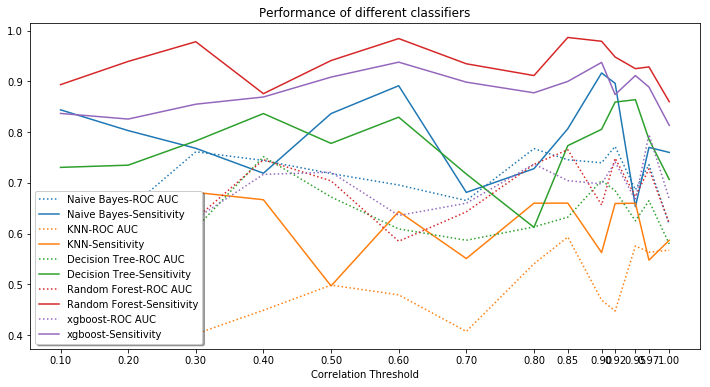

In [21]:
evaluate_threshold_performance(data, 
                               correlation_thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,], 
                               get_importants=get_inter_class_important_column_names)

* On average, the best performance is obtained at threshold close to 0.92

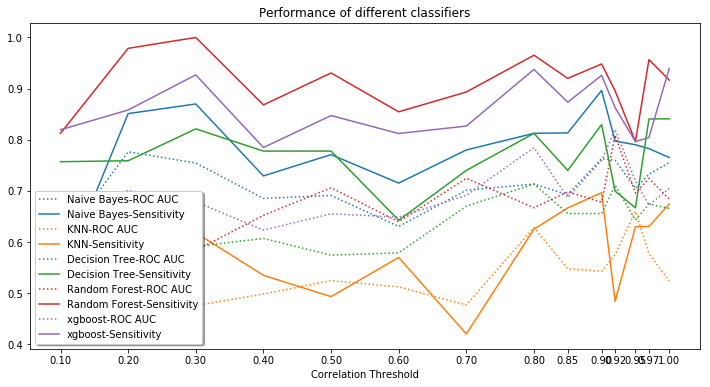

In [22]:
evaluate_threshold_performance(data, 
                               correlation_thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,], 
                               get_importants=get_intra_class_important_column_names)

* On average, the best performance is obtained at threshold close to 0.8

* Now that we know which are the best thresholds for those two methods lets compare them to each other

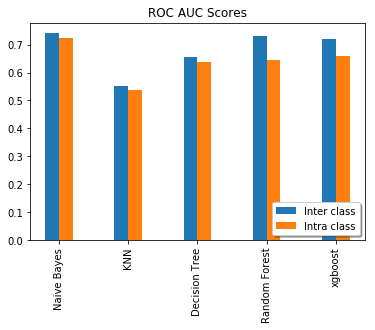

In [24]:
show_progress(
    evaluations=[
        evaluate(data[get_inter_class_important_column_names(data, correlation_threshold=0.92, plot_correlations=False)], split_dataset=SPLIT_DATASET), 
        evaluate(data[get_intra_class_important_column_names(data, correlation_threshold=0.8, plot_correlations=False)], split_dataset=SPLIT_DATASET), 
    ], 
    labels=['Inter class', 'Intra class'], 
    metric='ROC AUC')

* As in most of the cases Inter-class method outperforms slightly the intra-class ones, we will include selecting features based on the inter-class performance in our pipeline

## Feature analysis
As we don't know much about the variables and it's would be almost impossible to analyze the behaviour of all the 755 variables let's select some important ones and do exploratory analysis on them.

We will select the most important features based on the decision tree classifier and do some analysis on those.

In [25]:
import operator
def get_decision_importants(df, nb_importants=6):
    X_train, X_test, y_train, y_test = SPLIT_DATASET(df)
    tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    col2importance = dict(zip(df.columns, tree.feature_importances_))
    best = sorted(col2importance.items(), key=operator.itemgetter(1), reverse=True)[:nb_importants]

    return [name for name, score in best]

importants = get_decision_importants(data, nb_importants=8)
importants = data[importants]

<Figure size 432x288 with 0 Axes>

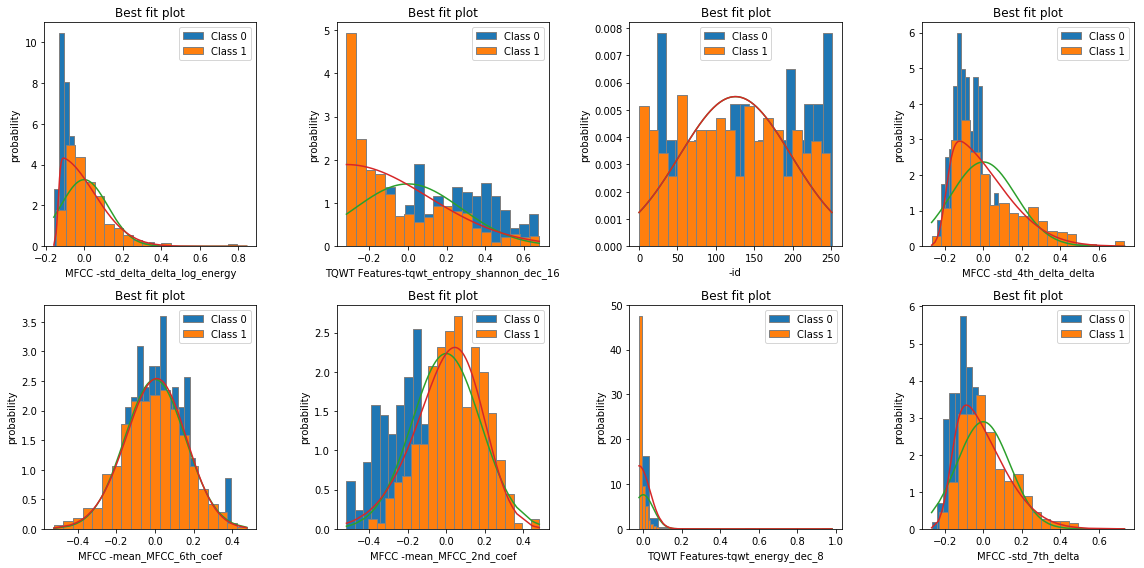

In [26]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
#     sigma, loc, scale = _stats.lognorm.fit(x_values)
#     distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
#     loc, scale = _stats.expon.fit(x_values)
#     distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
    a, loc, scale = _stats.skewnorm.fit(x_values)
    distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, labels: pd.Series, var: str):
    classes = labels.unique()[::-1]
    for c in classes:
        values = pd.Series([s for s, l in zip(series, labels) if l == c])
        values = values.sort_values().values
        n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey', label=f'Class {c}')
    values = series.sort_values().values
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit plot', var, 'probability', plot_legend=False)
    ax.legend()

columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), data['class'], columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

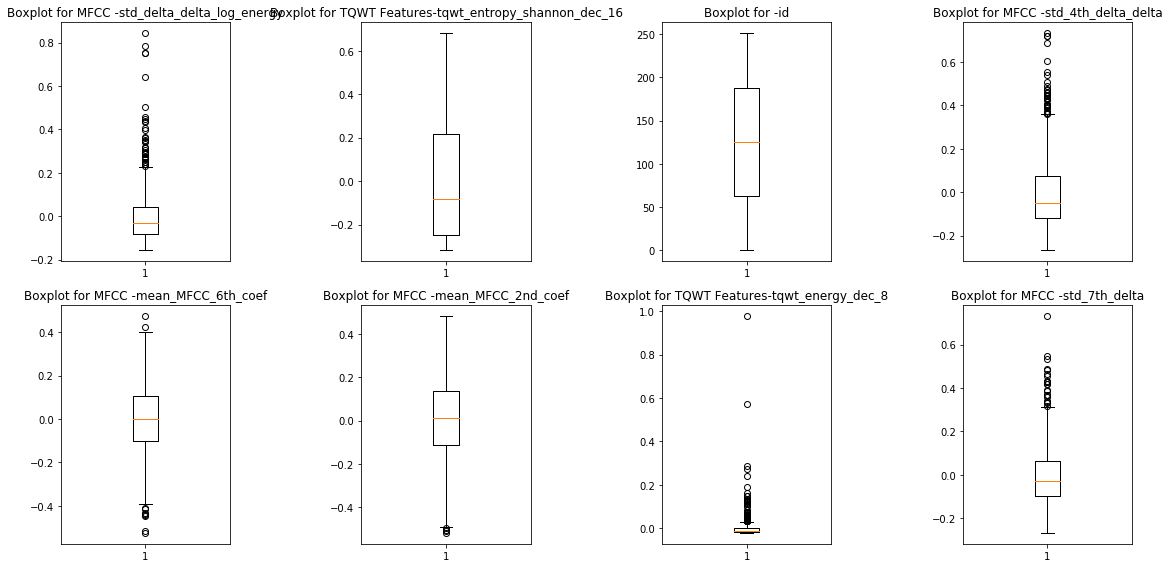

In [27]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Multi-Variate Analysis
##### Again, as the dataset is too large in terms of the number of columns, we will concentrate on the variables that are important based the previous findings

/usr/local/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 432x288 with 0 Axes>

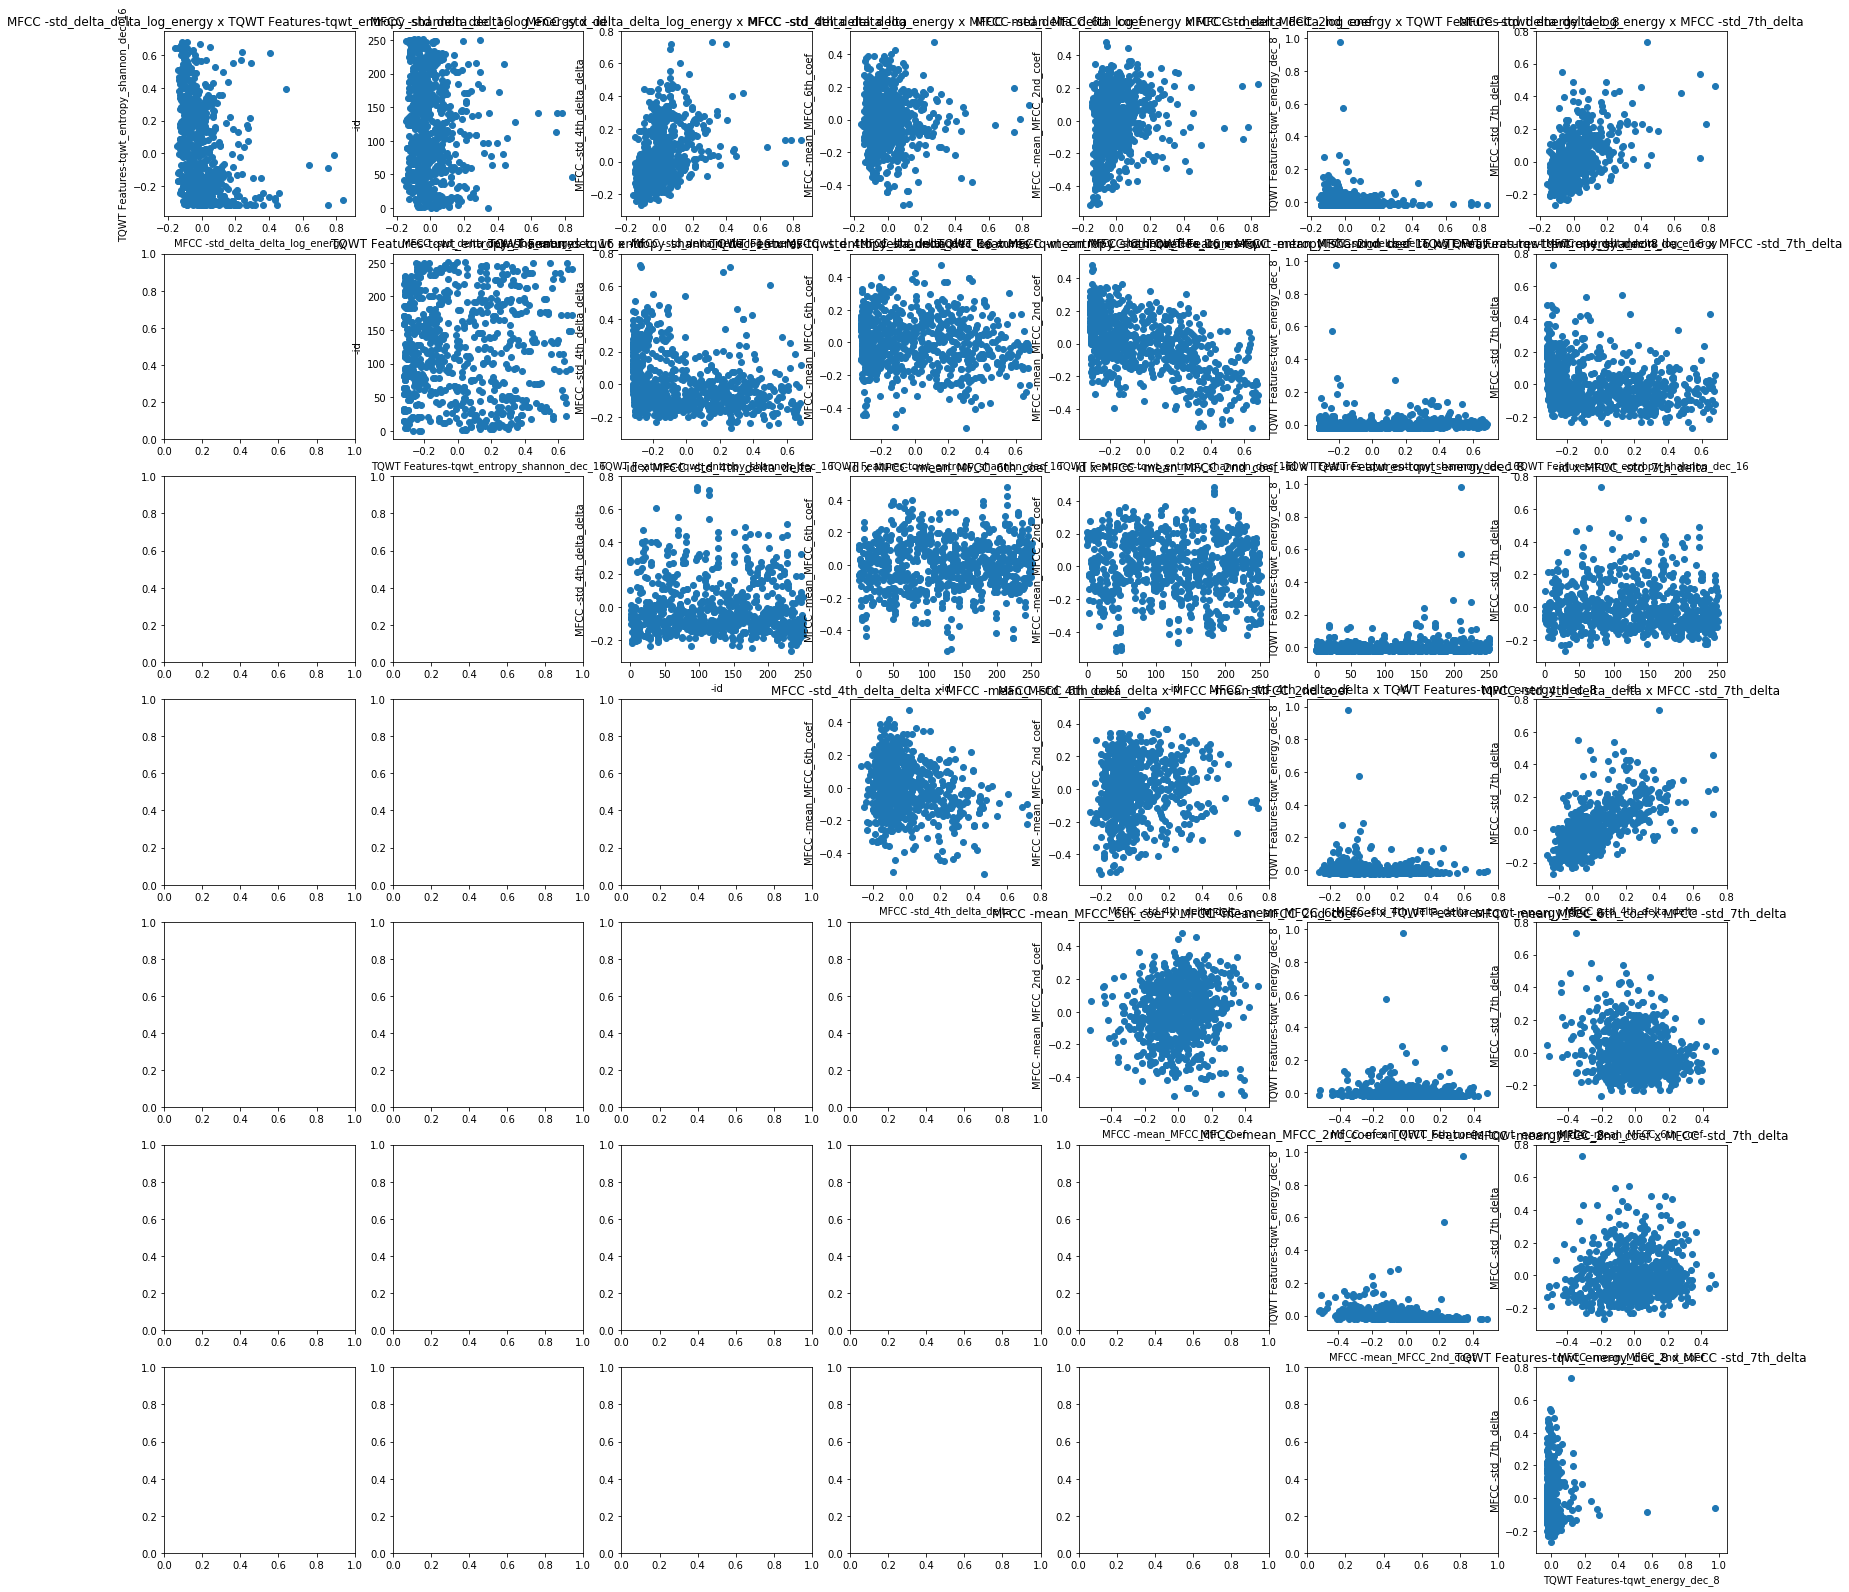

In [28]:
columns = importants.select_dtypes(include='number').columns

rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

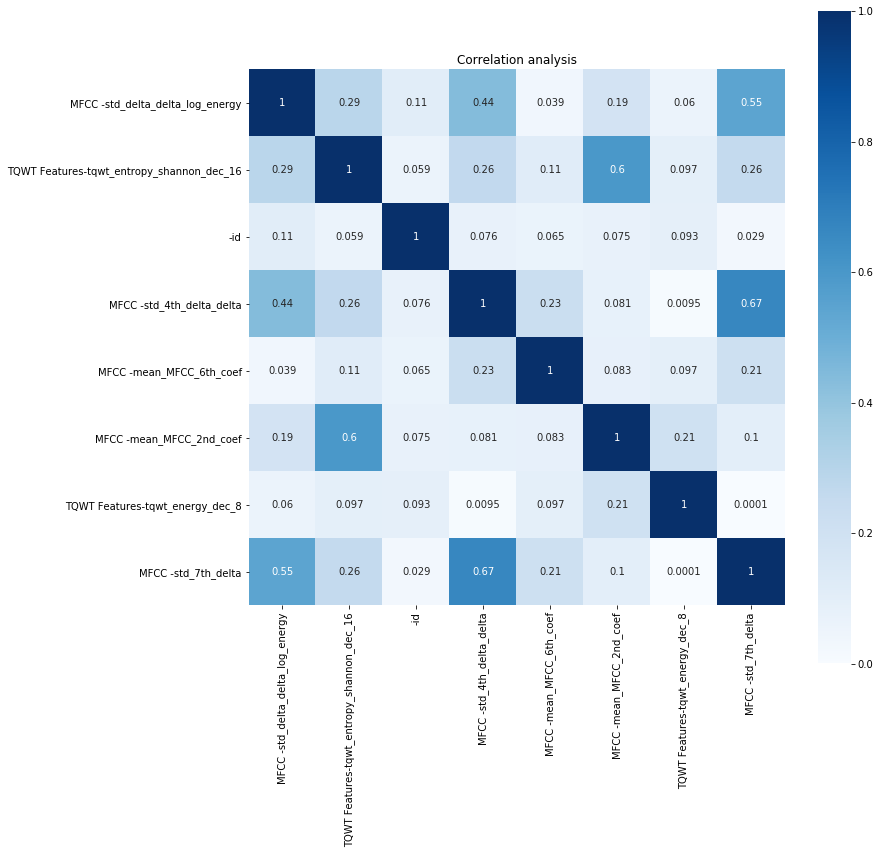

In [29]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = importants.corr().abs()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues', square=True)
plt.title('Correlation analysis')
plt.show()

## Classification

In [30]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight

In [31]:
X_train, X_test, y_train, y_test = SPLIT_DATASET(data)
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print('Class weights:', class_weight)

Class weights: [1.64015152 0.7192691 ]


### 1. Naive bayes

In [32]:
EVALUATION_METRIC = 'ROC AUC'

              precision    recall  f1-score   support

           0       0.53      0.58      0.56        60
           1       0.81      0.78      0.80       141

    accuracy                           0.72       201
   macro avg       0.67      0.68      0.68       201
weighted avg       0.73      0.72      0.72       201

Accuracy: 0.7213930348258707
ROC AUC: 0.6817375886524822
Sensitivity: 0.7801418439716312


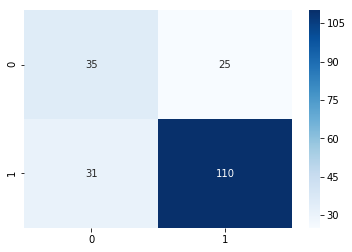

In [33]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
print('Sensitivity:', metrics.recall_score(y_test, y_pred))
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

### 2. KNN

[d=manhattan] Best acc: 0.7960199004975125, with nvalues: 7
[d=manhattan] Best auc: 0.7436170212765957, with nvalues: 3
[d=manhattan] Best sensitivity: 0.900709219858156, with nvalues: 9
---------------------------
[d=euclidean] Best acc: 0.736318407960199, with nvalues: 7
[d=euclidean] Best auc: 0.6879432624113477, with nvalues: 5
[d=euclidean] Best sensitivity: 0.8652482269503546, with nvalues: 13
---------------------------
[d=chebyshev] Best acc: 0.7164179104477612, with nvalues: 11
[d=chebyshev] Best auc: 0.6398936170212766, with nvalues: 11
[d=chebyshev] Best sensitivity: 0.851063829787234, with nvalues: 13
---------------------------
[d=minkowski] Best acc: 0.736318407960199, with nvalues: 7
[d=minkowski] Best auc: 0.6879432624113477, with nvalues: 5
[d=minkowski] Best sensitivity: 0.8652482269503546, with nvalues: 13
---------------------------
Obtained best ROC AUC: 0.7436170212765957 - with params: {'n_neighbors': 3, 'metric': 'manhattan'}


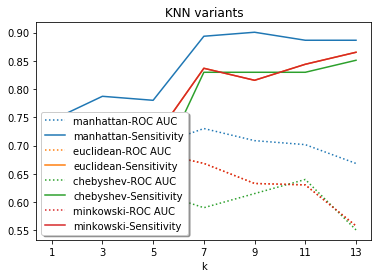

In [34]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13]
dist = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']
best = (-1, {})

performance = {}
for d in dist:
    performance[f'{d}-Accuracy'], performance[f'{d}-ROC AUC'], performance[f'{d}-Sensitivity'] = [], [], []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        performance[f'{d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
        performance[f'{d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'{d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
        if best[0] < performance[f'{d}-{EVALUATION_METRIC}'][-1]:
            best = (performance[f'{d}-{EVALUATION_METRIC}'][-1], {'n_neighbors': n, 'metric': d})
    acc = performance[f'{d}-Accuracy']
    auc = performance[f'{d}-ROC AUC']
    sens = performance[f'{d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nvalues: {nvalues[np.argmax(acc)]}')
    print(f'[d={d}] Best auc: {max(auc)}, with nvalues: {nvalues[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nvalues: {nvalues[np.argmax(sens)]}')
    print('---------------------------')
    del performance[f'{d}-Accuracy']
    
knn_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')

plt.figure()
plt.xticks(nvalues)
multiline_measure_line_chart(plt.gca(), nvalues, performance, title='KNN variants', xlabel='k', ylabel='')
plt.show()

## 3. Decision Tree

Min samples leaf: [0.001 0.011 0.021 0.031 0.041 0.051 0.061 0.071 0.081 0.091 0.101 0.111
 0.121 0.131 0.141 0.151 0.161 0.171 0.181 0.191]
[criterion=entropy, d=3] Best acc: 0.7512437810945274, with min_samples_leaf: 0.011
[criterion=entropy, d=3] Best auc: 0.674290780141844, with min_samples_leaf: 0.011
[criterion=entropy, d=3] Best sensitivity: 0.9148936170212766, with min_samples_leaf: 0.031
---------------------------
[criterion=entropy, d=5] Best acc: 0.6766169154228856, with min_samples_leaf: 0.051
[criterion=entropy, d=5] Best auc: 0.6668439716312057, with min_samples_leaf: 0.011
[criterion=entropy, d=5] Best sensitivity: 0.7304964539007093, with min_samples_leaf: 0.051
---------------------------
[criterion=entropy, d=7] Best acc: 0.7412935323383084, with min_samples_leaf: 0.021
[criterion=entropy, d=7] Best auc: 0.6719858156028369, with min_samples_leaf: 0.021
[criterion=entropy, d=7] Best sensitivity: 0.8439716312056738, with min_samples_leaf: 0.021
------------------------

<Figure size 432x288 with 0 Axes>

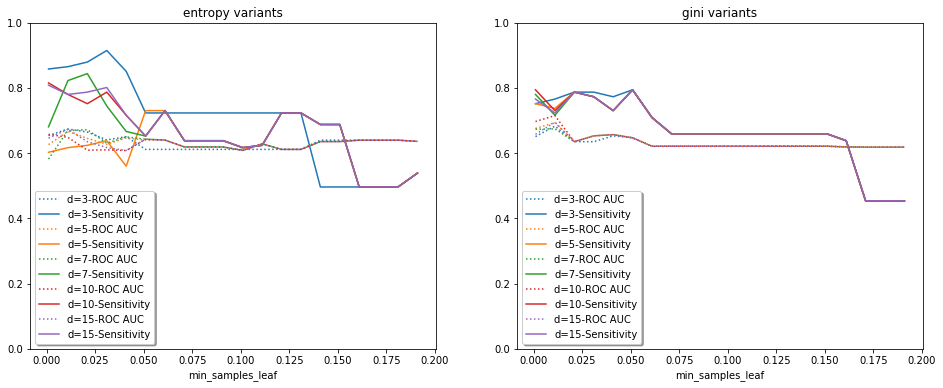

In [35]:
min_samples_leaf = np.array(range(1, 200, 10)) / 1000.
print('Min samples leaf:', min_samples_leaf)
max_depths = [3, 5, 7, 10, 15]
criteria = ['entropy', 'gini']
best = (-1, {})

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
for k, f in enumerate(criteria):
    performance = {}
    for d in max_depths:
        performance[f'd={d}-Accuracy'], performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], [], []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, class_weight='balanced')
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
            performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
            if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
                best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'min_samples_leaf': n, 'max_depth': d, 'criterion': f, 'class_weight': 'balanced'})

        acc = performance[f'd={d}-Accuracy']
        auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[criterion={f}, d={d}] Best acc: {max(acc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(acc)]}')
        print(f'[criterion={f}, d={d}] Best auc: {max(auc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(auc)]}')
        print(f'[criterion={f}, d={d}] Best sensitivity: {max(sens)}, with min_samples_leaf: {min_samples_leaf[np.argmax(sens)]}')
        print('---------------------------')
        del performance[f'd={d}-Accuracy']
        
    multiline_measure_line_chart(axs[0, k], min_samples_leaf, performance, title=f'{f} variants', xlabel='min_samples_leaf', ylabel='', percentage=True)
    
decision_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.show()

## 4. Random Forest

[max_features=sqrt, d=3] Best acc: 0.7761194029850746, with n_estimators: 150
[max_features=sqrt, d=3] Best auc: 0.7173758865248226, with n_estimators: 5
[max_features=sqrt, d=3] Best sensitivity: 0.8723404255319149, with n_estimators: 150
---------------------------
[max_features=sqrt, d=5] Best acc: 0.7860696517412935, with n_estimators: 75
[max_features=sqrt, d=5] Best auc: 0.7184397163120567, with n_estimators: 10
[max_features=sqrt, d=5] Best sensitivity: 0.8936170212765957, with n_estimators: 50
---------------------------
[max_features=sqrt, d=7] Best acc: 0.8159203980099502, with n_estimators: 50
[max_features=sqrt, d=7] Best auc: 0.7299645390070921, with n_estimators: 50
[max_features=sqrt, d=7] Best sensitivity: 0.9432624113475178, with n_estimators: 50
---------------------------
[max_features=sqrt, d=10] Best acc: 0.7960199004975125, with n_estimators: 25
[max_features=sqrt, d=10] Best auc: 0.7109929078014184, with n_estimators: 25
[max_features=sqrt, d=10] Best sensitivity

<Figure size 432x288 with 0 Axes>

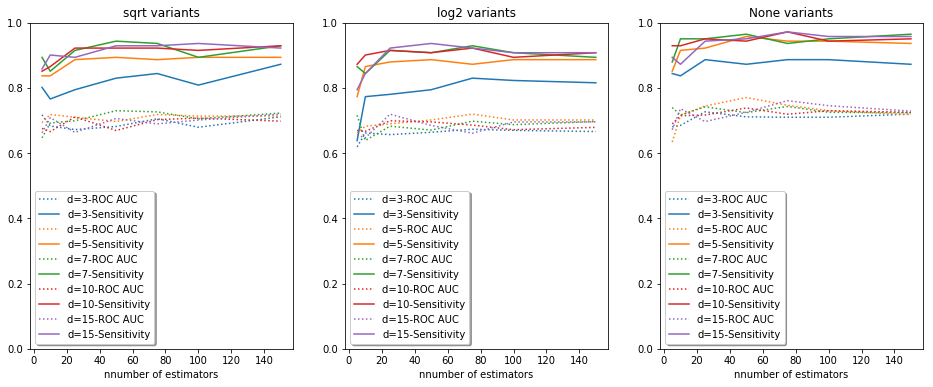

In [36]:
n_estimators = [5, 10, 25, 50, 75, 100, 150]
max_depths = [3, 5, 7, 10, 15]
max_features = ['sqrt', 'log2', None]
best = (-1, {})

plt.figure()
fig, axs = plt.subplots(1, len(max_features), figsize=(16, 6), squeeze=False)
for k, f in enumerate(max_features):
    performance = {}

    for d in max_depths:
        performance[f'd={d}-Accuracy'], performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], [], []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, class_weight='balanced')
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
            performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
            if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
                best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'n_estimators': n, 'max_depth': d, 'max_features': f, 'class_weight': 'balanced'})

        acc = performance[f'd={d}-Accuracy']
        auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[max_features={f}, d={d}] Best acc: {max(acc)}, with n_estimators: {n_estimators[np.argmax(acc)]}')
        print(f'[max_features={f}, d={d}] Best auc: {max(auc)}, with n_estimators: {n_estimators[np.argmax(auc)]}')
        print(f'[max_features={f}, d={d}] Best sensitivity: {max(sens)}, with n_estimators: {n_estimators[np.argmax(sens)]}')
        print('---------------------------')
        del performance[f'd={d}-Accuracy']
    multiline_measure_line_chart(axs[0, k], n_estimators, performance, title=f'{f} variants', xlabel='nnumber of estimators', ylabel='', percentage=True)
    
random_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.show()

## 5. xgboost

In [37]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

[d=3] Best acc: 0.8208955223880597, with nb_steps: 15
[d=3] Best auc: 0.7430851063829788, with nb_steps: 15
[d=3] Best sensitivity: 0.9432624113475178, with nb_steps: 25
---------------------------
[d=5] Best acc: 0.8208955223880597, with nb_steps: 35
[d=5] Best auc: 0.7382978723404255, with nb_steps: 35
[d=5] Best sensitivity: 0.9432624113475178, with nb_steps: 35
---------------------------
[d=7] Best acc: 0.8009950248756219, with nb_steps: 25
[d=7] Best auc: 0.7145390070921986, with nb_steps: 25
[d=7] Best sensitivity: 0.9290780141843972, with nb_steps: 25
---------------------------
[d=10] Best acc: 0.7910447761194029, with nb_steps: 30
[d=10] Best auc: 0.702659574468085, with nb_steps: 35
[d=10] Best sensitivity: 0.9290780141843972, with nb_steps: 30
---------------------------
[d=15] Best acc: 0.8109452736318408, with nb_steps: 40
[d=15] Best auc: 0.7312056737588654, with nb_steps: 40
[d=15] Best sensitivity: 0.9290780141843972, with nb_steps: 15
---------------------------
Obtai

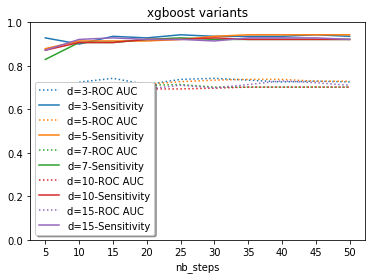

In [38]:
nb_steps = list(range(5, 51, 5))
max_depths = [3, 5, 7, 10, 15]
best = (-1, {})

performance = {}
for d in max_depths:
    performance[f'd={d}-Accuracy'], performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], [], []
    for n in nb_steps:
        param = {
            'eta': 0.3, 
            'max_depth': d,  
            'objective': 'multi:softprob',  
            'num_class': 2
        } 
        model = xgb.train(param, D_train, n)
        preds = model.predict(D_test)
        y_pred = np.asarray([np.argmax(line) for line in preds])

        performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
        performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
        if best[0] < performance[f'd={d}-{EVALUATION_METRIC}'][-1]:
            best = (performance[f'd={d}-{EVALUATION_METRIC}'][-1], {'num_boost_round': n, 'params': param})

    acc = performance[f'd={d}-Accuracy']
    auc = performance[f'd={d}-ROC AUC']
    sens = performance[f'd={d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nb_steps: {nb_steps[np.argmax(acc)]}')
    print(f'[d={d}] Best auc: {max(auc)}, with nb_steps: {nb_steps[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nb_steps: {nb_steps[np.argmax(sens)]}')
    print('---------------------------')
    del performance[f'd={d}-Accuracy']

xg_best = best
print(f'Obtained best {EVALUATION_METRIC}: {best[0]} - with params: {best[1]}')
plt.figure()
plt.xticks(nb_steps)
multiline_measure_line_chart(plt.gca(), nb_steps, performance, title='xgboost variants', xlabel='nb_steps', ylabel='', percentage=True)
plt.show()

## Comparison between the best models

{'Decision Tree': {'Accuracy': 0.6307692307692307,
                   'ROC AUC': 0.6122222222222221,
                   'Sensitivity': 0.6466666666666666},
 'KNN': {'Accuracy': 0.7384615384615385,
         'ROC AUC': 0.7055555555555555,
         'Sensitivity': 0.7666666666666667},
 'Naive Bayes': {'Accuracy': 0.7794871794871795,
                 'ROC AUC': 0.771111111111111,
                 'Sensitivity': 0.7866666666666666},
 'Random Forest': {'Accuracy': 0.841025641025641,
                   'ROC AUC': 0.78,
                   'Sensitivity': 0.8933333333333333},
 'xgboost': {'Accuracy': 0.9333333333333333,
             'ROC AUC': 0.91,
             'Sensitivity': 0.9533333333333334}}


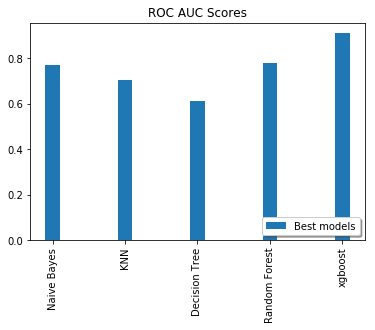

In [39]:
from pprint import pprint

boost = xgb.train(dtrain=D_train, **xg_best[1])
res = evaluate(data, split_dataset=SPLIT_DATASET, 
         knn=KNeighborsClassifier(**knn_best[1]), 
         tree=DecisionTreeClassifier(**decision_best[1]), 
         rf=RandomForestClassifier(**random_best[1]), 
         boost=boost)

pprint(res)
show_progress(evaluations=[res], labels=['Best models'], metric=EVALUATION_METRIC)

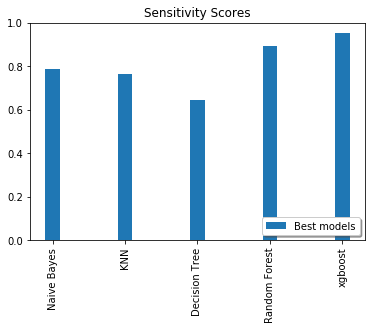

In [40]:
show_progress(
    evaluations=[res], 
    labels=['Best models'], 
    metric='Sensitivity'
)

* As we can see, the xgboost is the winner
* 'num_boost_round': 15, 'params': {'eta': 0.3, 'max_depth': 3, 'objective': 'multi:softprob', 'num_class': 2}

## Association Rules

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

### pd.cut

In [22]:
# pd.cut
selected_columns = get_inter_class_important_column_names(data, correlation_threshold=0.1, plot_correlations=False)
selected_columns = set(selected_columns + ['-gender'])
selected_columns.remove('-id')
selected_columns.remove('class')

newdf = data[selected_columns].copy()
for col in newdf:
    if col not in ['-gender']: 
        newdf[col] = pd.cut(newdf[col],3,labels=['0','1','2'])
newdf.head(5)

,TQWT Features-tqwt_medianValue_dec_26,TQWT Features-tqwt_skewnessValue_dec_3,Baseline Features-DFA,Bandwidth Parameters-b3,Vocal Fold-GQ_prc5_95,Wavelet Features-Ea,-gender,Bandwidth Parameters-b2,Baseline Features-PPE,MFCC -mean_Log_energy,Bandwidth Parameters-b1,Bandwidth Parameters-b4,TQWT Features-tqwt_energy_dec_1,Intensity Parameters-minIntensity,Formant Frequencies-f1,MFCC -mean_12th_delta
0,1,0,1,0,2,2,1,0,2,2,0,0,0,2,1,1
1,1,0,1,0,2,2,1,0,2,2,0,0,0,2,1,1
2,1,0,1,0,2,2,1,0,2,1,0,0,0,1,1,1
3,1,0,2,0,2,2,0,0,1,2,0,0,0,2,2,1
4,2,0,2,0,2,2,0,0,0,2,0,0,0,2,2,1


In [23]:
dummylist = []
for att in newdf:
    if att in ['-gender']:
        newdf[att] = newdf[att].astype('category')
    dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,TQWT Features-tqwt_medianValue_dec_26_0,TQWT Features-tqwt_medianValue_dec_26_1,TQWT Features-tqwt_medianValue_dec_26_2,TQWT Features-tqwt_skewnessValue_dec_3_0,TQWT Features-tqwt_skewnessValue_dec_3_1,TQWT Features-tqwt_skewnessValue_dec_3_2,Baseline Features-DFA_0,Baseline Features-DFA_1,Baseline Features-DFA_2,Bandwidth Parameters-b3_0,Bandwidth Parameters-b3_1,Bandwidth Parameters-b3_2,Vocal Fold-GQ_prc5_95_0,Vocal Fold-GQ_prc5_95_1,Vocal Fold-GQ_prc5_95_2,Wavelet Features-Ea_0,Wavelet Features-Ea_1,Wavelet Features-Ea_2,-gender_0,-gender_1,Bandwidth Parameters-b2_0,Bandwidth Parameters-b2_1,Bandwidth Parameters-b2_2,Baseline Features-PPE_0,Baseline Features-PPE_1,Baseline Features-PPE_2,MFCC -mean_Log_energy_0,MFCC -mean_Log_energy_1,MFCC -mean_Log_energy_2,Bandwidth Parameters-b1_0,Bandwidth Parameters-b1_1,Bandwidth Parameters-b1_2,Bandwidth Parameters-b4_0,Bandwidth Parameters-b4_1,Bandwidth Parameters-b4_2,TQWT Features-tqwt_energy_dec_1_0,TQWT Features-tqwt_energy_dec_1_1,TQWT Features-tqwt_energy_dec_1_2,Intensity Parameters-minIntensity_0,Intensity Parameters-minIntensity_1,Intensity Parameters-minIntensity_2,Formant Frequencies-f1_0,Formant Frequencies-f1_1,Formant Frequencies-f1_2,MFCC -mean_12th_delta_0,MFCC -mean_12th_delta_1,MFCC -mean_12th_delta_2
0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


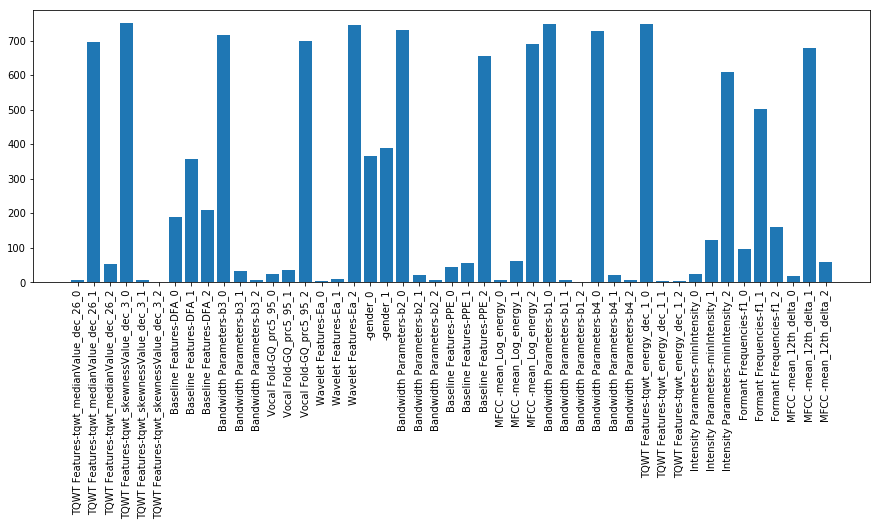

In [24]:
mp = {}
for col in list(dummified_df): mp[col] = (dummified_df[col] == 1).sum()
keys = list(mp.keys())
freqs = list(mp.values())
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(freqs)), freqs)
_ = plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')

Min support: 0.8687458127689781


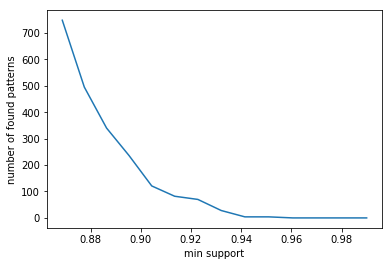

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
594,"(Bandwidth Parameters-b1_0, Wavelet Features-E...",(TQWT Features-tqwt_skewnessValue_dec_3_0),0.899471,0.992063,0.892857,0.992647,1.000588,0.000525,1.079365,3
595,"(Bandwidth Parameters-b1_0, Wavelet Features-E...",(TQWT Features-tqwt_medianValue_dec_26_1),0.966931,0.921958,0.892857,0.923393,1.001556,0.001387,1.018731,3
596,"(TQWT Features-tqwt_medianValue_dec_26_1, Wave...",(Bandwidth Parameters-b1_0),0.900794,0.989418,0.892857,0.991189,1.001790,0.001596,1.201058,3
597,"(Bandwidth Parameters-b1_0, TQWT Features-tqwt...",(Wavelet Features-Ea_2),0.906085,0.984127,0.892857,0.985401,1.001295,0.001155,1.087302,3
608,"(TQWT Features-tqwt_medianValue_dec_26_1, Wave...",(TQWT Features-tqwt_skewnessValue_dec_3_0),0.876984,0.992063,0.870370,0.992459,1.000398,0.000346,1.052381,3
...,...,...,...,...,...,...,...,...,...,...
2424,"(Bandwidth Parameters-b2_0, TQWT Features-tqwt...","(Bandwidth Parameters-b1_0, Wavelet Features-E...",0.949735,0.936508,0.888889,0.935933,0.999386,-0.000546,0.991028,3
2425,"(Wavelet Features-Ea_2, Bandwidth Parameters-b...","(Bandwidth Parameters-b2_0, Bandwidth Paramete...",0.940476,0.945767,0.888889,0.945148,0.999345,-0.000583,0.988706,3
2426,"(Bandwidth Parameters-b2_0, Wavelet Features-E...","(Bandwidth Parameters-b1_0, TQWT Features-tqwt...",0.912698,0.973545,0.888889,0.973913,1.000378,0.000336,1.014109,3
2427,"(Bandwidth Parameters-b2_0, Bandwidth Paramete...","(Bandwidth Parameters-b1_0, TQWT Features-tqwt...",0.920635,0.966931,0.888889,0.965517,0.998538,-0.001302,0.958995,3


In [26]:
minpatterns = 500
min_support = 1.
assoc = {}

while min_support > 0:
    min_support *= 0.99

    frequent_itemsets = apriori(dummified_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    res = rules[(rules['antecedent_len']>=3)]
    assoc[min_support] = len(res)
    if len(res) >= minpatterns:
        break

print(f'Min support: {min_support}')
plt.figure()
plt.plot(assoc.keys(), assoc.values())
plt.xlabel('min support')
plt.ylabel('number of found patterns')
plt.show()
res

### pd.qcut

In [29]:
selected_columns = get_inter_class_important_column_names(data, correlation_threshold=0.1, plot_correlations=False)
selected_columns = set(selected_columns + ['-gender'])
selected_columns.remove('-id')
selected_columns.remove('class')

newdf = data[selected_columns].copy()
for col in newdf:
    if col not in ['-gender']: 
        newdf[col] = pd.qcut(newdf[col].rank(method='first'),3,labels=['0','1','2'], duplicates='drop')
newdf.head(5)

,TQWT Features-tqwt_medianValue_dec_26,TQWT Features-tqwt_skewnessValue_dec_3,Baseline Features-DFA,Bandwidth Parameters-b3,Vocal Fold-GQ_prc5_95,Wavelet Features-Ea,-gender,Bandwidth Parameters-b2,Baseline Features-PPE,MFCC -mean_Log_energy,Bandwidth Parameters-b1,Bandwidth Parameters-b4,TQWT Features-tqwt_energy_dec_1,Intensity Parameters-minIntensity,Formant Frequencies-f1,MFCC -mean_12th_delta
0,1,1,1,1,0,2,1,0,2,0,0,1,0,1,0,0
1,1,1,1,1,0,2,1,0,0,0,0,1,0,0,0,2
2,1,1,1,0,0,2,1,0,2,0,1,0,1,0,0,1
3,2,2,2,2,1,0,0,1,0,1,2,2,1,2,2,2
4,2,0,2,1,1,0,0,1,0,2,2,1,1,2,2,0


In [30]:
dummylist = []
for att in newdf:
    if att in ['-gender']:
        newdf[att] = newdf[att].astype('category')
    dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,TQWT Features-tqwt_medianValue_dec_26_0,TQWT Features-tqwt_medianValue_dec_26_1,TQWT Features-tqwt_medianValue_dec_26_2,TQWT Features-tqwt_skewnessValue_dec_3_0,TQWT Features-tqwt_skewnessValue_dec_3_1,TQWT Features-tqwt_skewnessValue_dec_3_2,Baseline Features-DFA_0,Baseline Features-DFA_1,Baseline Features-DFA_2,Bandwidth Parameters-b3_0,Bandwidth Parameters-b3_1,Bandwidth Parameters-b3_2,Vocal Fold-GQ_prc5_95_0,Vocal Fold-GQ_prc5_95_1,Vocal Fold-GQ_prc5_95_2,Wavelet Features-Ea_0,Wavelet Features-Ea_1,Wavelet Features-Ea_2,-gender_0,-gender_1,Bandwidth Parameters-b2_0,Bandwidth Parameters-b2_1,Bandwidth Parameters-b2_2,Baseline Features-PPE_0,Baseline Features-PPE_1,Baseline Features-PPE_2,MFCC -mean_Log_energy_0,MFCC -mean_Log_energy_1,MFCC -mean_Log_energy_2,Bandwidth Parameters-b1_0,Bandwidth Parameters-b1_1,Bandwidth Parameters-b1_2,Bandwidth Parameters-b4_0,Bandwidth Parameters-b4_1,Bandwidth Parameters-b4_2,TQWT Features-tqwt_energy_dec_1_0,TQWT Features-tqwt_energy_dec_1_1,TQWT Features-tqwt_energy_dec_1_2,Intensity Parameters-minIntensity_0,Intensity Parameters-minIntensity_1,Intensity Parameters-minIntensity_2,Formant Frequencies-f1_0,Formant Frequencies-f1_1,Formant Frequencies-f1_2,MFCC -mean_12th_delta_0,MFCC -mean_12th_delta_1,MFCC -mean_12th_delta_2
0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0


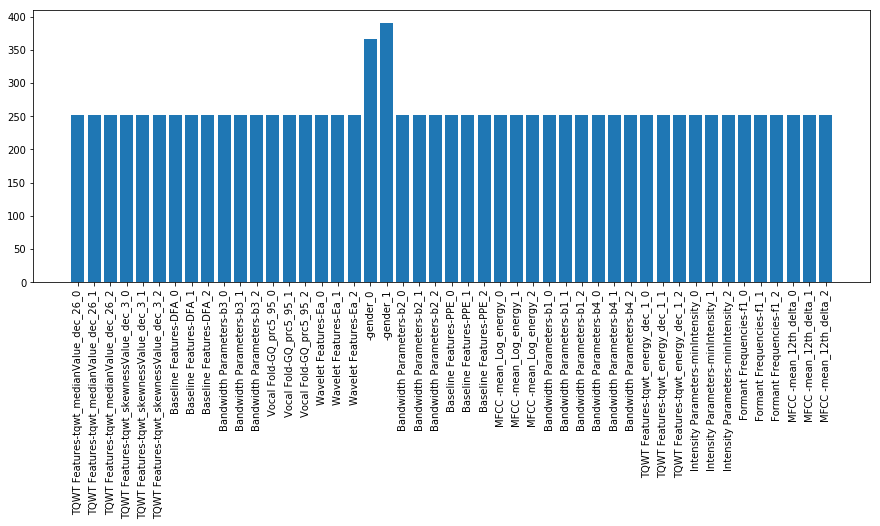

In [31]:
mp = {}
for col in list(dummified_df): mp[col] = (dummified_df[col] == 1).sum()
keys = list(mp.keys())
freqs = list(mp.values())
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(freqs)), freqs)
_ = plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')

Min support: 0.06565673966414415


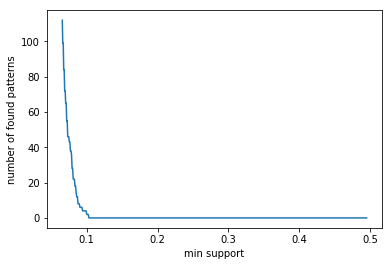

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
155,"(TQWT Features-tqwt_skewnessValue_dec_3_1, -ge...",(TQWT Features-tqwt_medianValue_dec_26_1),0.078042,0.333333,0.067460,0.864407,2.593220,0.041446,4.916667,3
156,"(-gender_1, TQWT Features-tqwt_medianValue_dec...",(TQWT Features-tqwt_skewnessValue_dec_3_1),0.071429,0.333333,0.067460,0.944444,2.833333,0.043651,12.000000,3
157,"(TQWT Features-tqwt_skewnessValue_dec_3_1, Ban...",(TQWT Features-tqwt_medianValue_dec_26_1),0.085979,0.333333,0.079365,0.923077,2.769231,0.050705,8.666667,3
158,"(Bandwidth Parameters-b1_2, TQWT Features-tqwt...",(TQWT Features-tqwt_skewnessValue_dec_3_1),0.085979,0.333333,0.079365,0.923077,2.769231,0.050705,8.666667,3
159,"(TQWT Features-tqwt_skewnessValue_dec_3_1, Int...",(TQWT Features-tqwt_medianValue_dec_26_1),0.088624,0.333333,0.083333,0.940299,2.820896,0.053792,11.166667,3
...,...,...,...,...,...,...,...,...,...,...
263,"(Formant Frequencies-f1_2, Vocal Fold-GQ_prc5_...",(MFCC -mean_Log_energy_2),0.079365,0.333333,0.067460,0.850000,2.550000,0.041005,4.444444,4
264,"(Vocal Fold-GQ_prc5_95_2, Intensity Parameters...",(Formant Frequencies-f1_2),0.083333,0.333333,0.067460,0.809524,2.428571,0.039683,3.500000,4
265,"(Formant Frequencies-f1_2, Vocal Fold-GQ_prc5_...",(-gender_0),0.071429,0.484127,0.067460,0.944444,1.950820,0.032880,9.285714,4
266,"(Formant Frequencies-f1_2, Vocal Fold-GQ_prc5_...",(Intensity Parameters-minIntensity_2),0.076720,0.333333,0.067460,0.879310,2.637931,0.041887,5.523810,4


In [34]:
minpatterns = 100
min_support = 0.5
assoc = {}

while min_support > 0:
    min_support *= 0.99

    frequent_itemsets = apriori(dummified_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    res = rules[(rules['antecedent_len']>=3)]
    assoc[min_support] = len(res)
    if len(res) >= minpatterns:
        break

print(f'Min support: {min_support}')
plt.figure()
plt.plot(assoc.keys(), assoc.values())
plt.xlabel('min support')
plt.ylabel('number of found patterns')
plt.show()
res

## Clustering

In [50]:
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import contingency_matrix

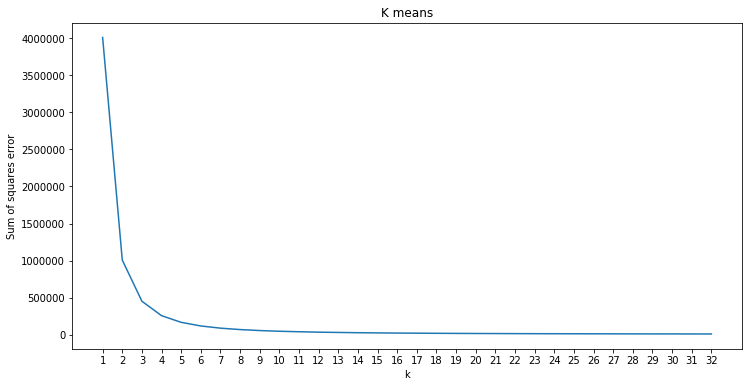

In [51]:
errors = {'Sum of squares': []}
ks = list(range(1, 33))
for k in ks:
    X = data.loc[:, ~data.columns.isin(['class'])]
    kmeans_model = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
    errors['Sum of squares'].append(kmeans_model.inertia_)

plt.figure(figsize=(12, 6))
plt.xticks(ks)
func.multiple_line_chart(plt.gca(), ks, errors, 'K means', 'k', 'Sum of squares error', plot_legend=False)

* According to the elbow method the best number of clusters is 3 or 4
* We will pick 3 as the optimal number of cluster

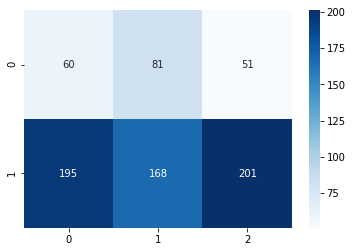

In [52]:
kmeans_model = cluster.KMeans(n_clusters=3, random_state=1).fit(data.loc[:, ~data.columns.isin(['class'])])
matrix = contingency_matrix(data['class'].values, kmeans_model.labels_)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', square=False)

In [53]:
data.head()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

In [54]:
from scipy import arange

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]


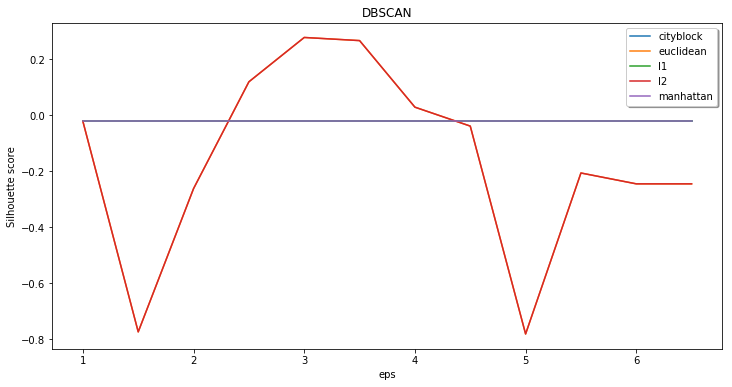

In [61]:
distances = ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
epss = arange(1, 7, 0.5)
print(epss)

performance = {}
for d in distances:
    performance[d] = []
    for e in epss:
        X = data.loc[:, ~data.columns.isin(['class'])]
        db = DBSCAN(eps=e, min_samples=2, metric=d)
        labels = db.fit_predict(X)
        performance[d].append(metrics.silhouette_score(X, labels))

plt.figure(figsize=(12, 6))
# plt.xticks(epss)
func.multiple_line_chart(plt.gca(), epss, performance, 'DBSCAN', 'eps', 'Silhouette score', plot_legend=True)
plt.show()

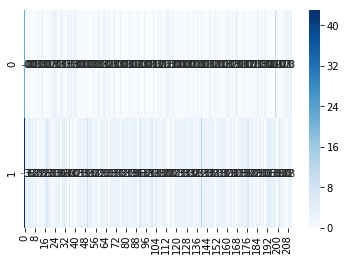

In [62]:
db = DBSCAN(eps=3, min_samples=2, metric='l2')
labels = db.fit_predict(data.loc[:, ~data.columns.isin(['class'])])
matrix = contingency_matrix(data['class'].values, labels)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', square=False)

## clustering visualization

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)
pca.fit(data.loc[:, ~data.columns.isin(['class'])])

print("Components (eigenvectors):\n",pca.components_)
print("Explained variance (eigenvalues) =",pca.explained_variance_)
print("Explained variance (ratio) =",pca.explained_variance_ratio_)

X_pca = pca.transform(X)
print(X_pca.shape)

Components (eigenvectors):
 [[ 9.99996140e-01 -9.17960250e-04  7.16105085e-05 ... -2.08439420e-04
  -2.06223203e-04 -1.70282917e-04]
 [-1.09776802e-03 -1.42140888e-01  2.16539397e-02 ... -2.67291739e-02
  -4.09306825e-02 -5.55882954e-02]]
Explained variance (eigenvalues) = [5.29896673e+03 1.98136680e+00]
Explained variance (ratio) = [9.98011534e-01 3.73172171e-04]
(756, 2)


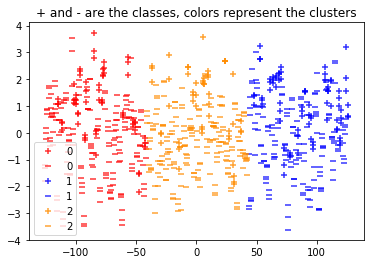

In [66]:
colors = ['red', 'blue', 'darkorange']


kmeans_model = cluster.KMeans(n_clusters=3, random_state=1).fit(data.loc[:, ~data.columns.isin(['class'])])
for l, col in zip(set(kmeans_model.labels_), colors):
    plt.scatter(X_pca[np.logical_and(kmeans_model.labels_ == l, data['class'].values == 0), 0], X_pca[np.logical_and(kmeans_model.labels_ == l, data['class'].values == 0), 1], 
                alpha=.8,
                color=col, 
                marker='+', 
                label=str(l))
    plt.scatter(X_pca[np.logical_and(kmeans_model.labels_ == l, data['class'].values != 0), 0], X_pca[np.logical_and(kmeans_model.labels_ == l, data['class'].values != 0), 1], 
                alpha=.8,
                color=col, 
                marker='_', 
                label=str(l))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('+ and - are the classes, colors represent the clusters')
plt.show()

## PCA

In [67]:
data.loc[:, ~data.columns.isin(['class'])]

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

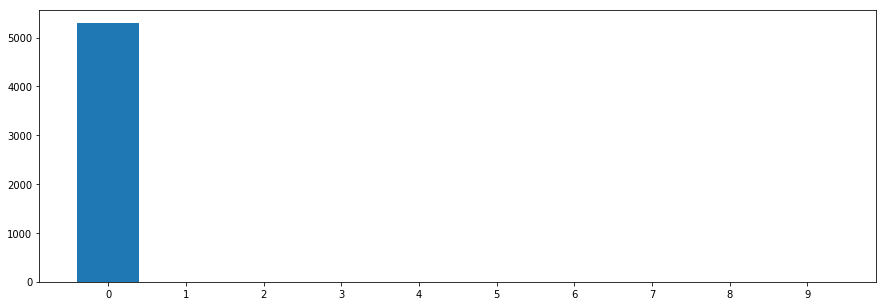

In [68]:
pca = PCA(n_components=10)
pca.fit(data.loc[:, ~data.columns.isin(['class'])])

x = pca.explained_variance_
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(x)), x)
_ = plt.xticks(np.arange(len(x)), np.arange(len(x)))